In [44]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#create a class that has multiple function for the chess game
class chess_games():
    #get the pgn file
    def __init__(self, file_name):
        self.file_name = file_name
    
    #clear the pgn file and return a game_string.txt
    def clear_chess_moves(self):
        #open the file
        chess_game = open(self.file_name)
        #get the file texts
        file_text = chess_game.read()
        #list that store chess moves
        chess_moves = []
        #clear all [] and everything inside the []
        clear_brackets=re.sub("\[.*?\]","",file_text)
        remove_space = clear_brackets.replace('\n', '')
        #split lines by scores '1-0', '1/2-1/2', '0-1'
        cleaned_chess_moves = re.split('  1-0|  1/2-1/2|  0-1|  \*', remove_space)
        #clear empty list
        cleaned_chess_moves = list(filter(None, cleaned_chess_moves))
        #write cleaned data into a new txt file
        with open('game_string.txt','w') as chess:
            #write each value from the list
            for i in range(len(cleaned_chess_moves)):
                #strip whitespace from right and left
                chess.write(str(cleaned_chess_moves[i].strip()) + '\n')
        #print total games
        print('total games: ' + str(len(cleaned_chess_moves)))
        #close the file
        chess.close()
        
    #split into two files
    def split_white_black_moves(self):
        #call the clear_chess_moves first incase there is no game_string document
        self.clear_chess_moves()
        #open the game_string txt file
        with open('game_string.txt','r') as game:
            #read the file
            game_file = game.read()
            #split files by lines, which make it become a list
            game_list = game_file.splitlines()
            #created a list for splited list
            game_list_splited = []
            #list that store each signle moves
            game_list_splited_moves = []
            #split by the '' \d{1,100}\W' format which is the index for each value in the list.
            for i in range(len(game_list)):
                game_list_splited.append(re.split(r' \d+\W', game_list[i]))
            for i in range(len(game_list_splited)):
                #in the splited list, remove the first index for each list that could not
                #from the previous step
                game_list_splited[i][0] = re.sub(r'1\W','',game_list_splited[i][0])
                #list that store all splited moves for one game. clear to empty everytime when one game's loop is finished
                moves=[]
                for j in range(len(game_list_splited[i])):
                    #split each moves by the empty space between each player's moves
                    moves.append(game_list_splited[i][j].split(' '))
                #append each splited game moves in the game_list_splited_moves
                game_list_splited_moves.append(moves)
            game.close()
        #print write chess moves for each player for each game
        for i in range(len(game_list_splited_moves)):
            #files for white move and black moves
            white_moves = open(str(i+1)+'w.txt','w')
            black_moves = open(str(i+1)+'b.txt','w')
            #label each game
            white_moves.write(str(i+1) + 'w\n')
            black_moves.write(str(i+1) + 'b\n')
            #loop moves for both white and black player
            for j in range(len(game_list_splited_moves[i])):
                #some game has no black player moves, if the len > 1 means both player has moves
                if len(game_list_splited_moves[i][j]) > 1:
                    #write each white player moves in the file
                    white_moves.write(str(j+1)+': '+game_list_splited_moves[i][j][0] + ', ')
                    black_moves.write(str(j+1)+': '+game_list_splited_moves[i][j][1] + ', ')
                #if only white player moved
                if len(game_list_splited_moves[i][j]) == 1:
                    #write each white player moves in the file
                    white_moves.write(str(j+1)+': '+game_list_splited_moves[i][j][0] + ', ')
                    black_moves.write('')
            white_moves.write('\n')
            black_moves.write('\n')
            #close files
            white_moves.close()
            black_moves.close()
        print('white and black players moves for all games has been seprated into each files')
    #counts repeated moves for each first move
    def dataframe_counts(self):
        #clear moves, make sure there will be a game_string file or remove the old game_string file
        self.clear_chess_moves()
        #open the game_string.txt
        with open('game_string.txt','r') as file:
            #read the file
            game_list = file.read()
            #create a data frame for saving white and black counts
            count_white = pd.DataFrame(columns= ['White'])
            count_black = pd.DataFrame(columns=['Black'])
            #find all first moves
            first_step = re.findall(r'1\.(\w{1,2}\d{1})\s(\w{1,2}\d)\s2\.',game_list)
            #if the black do not have first moves, only append the white player moves.
            first_step.append(re.findall(r'\n1\.(\w{1,2}\d)\n',game_list))
            #print the length of the game list
            #counting moves
            for i in range(len(first_step)):
                #count white moves
                #if the index exist +=1
                if len(first_step[i]) > 1:
                    if first_step[i][0] in count_white.index:
                        count_white.loc[first_step[i][0],'White'] += 1
                    else:
                        #if the index do not exist, create a new row and set the value to 1
                        count_white.loc[first_step[i][0]] = 1
                    #count black moves
                    #if the index exist +=1
                    if first_step[i][1] in count_black.index:
                        count_black.loc[first_step[i][1],'Black'] += 1
                    else:
                        #if the index do not exist, create a new row and set the value to 1
                        count_black.loc[first_step[i][1]] = 1
                if len(first_step[i]) == 1:
                    if first_step[i][0] in count_white.index:
                        count_white.loc[first_step[i][0],'White'] += 1
                    else:
                        #if the index do not exist, create a new row and set the value to 1
                        count_white.loc[first_step[i][0]] = 1
            #return the dataframes in a tuple
            self.white_black = (count_white, count_black)
            return self.white_black
    #plot two bar chart for top ten repeated moves
    def plotting(self):
        self.dataframe_counts()
        #convert the white and black dataframe to dict
        w_dict = self.white_black[0].to_dict()
        b_dict = self.white_black[1].to_dict()
        #empty dict that store top ten moves for black and white
        w_dict_top_ten = {}
        b_dict_top_ten = {}
        #combine white and black dict for the convenience of sorting
        w_dict['White'].update(b_dict['Black'])
        merged_dict = w_dict['White']
        #sort the merged dict and listed as keys
        sorted_merge_dict_keys = sorted(merged_dict,key=merged_dict.get)
        #store sorted top ten moves
        top_ten = {}
        for keys in sorted_merge_dict_keys:
            top_ten[keys] = merged_dict[keys]
        #convert the top_ten to a list
        top_ten_list = list(top_ten.items())
        #get the length of the list
        n = len(top_ten_list)
        #get the top ten repeated moves
        top_ten_list = top_ten_list[n-10:n]
        #filter black and white moves from the list
        for i in range(len(top_ten_list)):
            #if the key in black or white dataframe, save it in the predefined dict
            if top_ten_list[i][0] in self.white_black[0].index:
                w_dict_top_ten[top_ten_list[i][0]] = top_ten_list[i][1]
            if top_ten_list[i][0] in self.white_black[1].index:
                b_dict_top_ten[top_ten_list[i][0]] = top_ten_list[i][1]
        #convert the black and white dict to dataframe for plotting
        w_df = pd.DataFrame({'Move':w_dict_top_ten.keys(),'Times':w_dict_top_ten.values()})
        b_df = pd.DataFrame({'Move':b_dict_top_ten.keys(),'Times':b_dict_top_ten.values()})
        #predefine the x and y for both white and black
        w_x = w_df['Move']
        w_y = w_df['Times']
        b_x = b_df['Move']
        b_y = b_df['Times']
        #first bar chart
        #plot bar chart for white and black moves
        plt.bar(w_x, w_y,label='White Moves')
        plt.bar(b_x, b_y,label='Black Moves')
        plt.xlabel("Moves")
        plt.ylabel("Number of Moves Occured")
        plt.title("Top ten most repeated moves")
        plt.legend()
        plt.show()
        #second bar chart
        #plot bar chart for white and black moves
        fig, ax = plt.subplots()
        fig.suptitle('Red - White Moves | Blue - Black Moves')
        for i in range(len(top_ten_list)):
            if top_ten_list[i][0] in self.white_black[0].index:
                ax.bar(top_ten_list[i][0],top_ten_list[i][1],color='r')
            if top_ten_list[i][0] in self.white_black[1].index:
                ax.bar(top_ten_list[i][0],top_ten_list[i][1],color='b')
            ax.text(top_ten_list[i][0],top_ten_list[i][1],s=top_ten_list[i][1])
        ax.set_xlabel("Unique Moves")
        ax.set_ylabel("Number of Moves Occured")
        plt.show()

total games: 2110


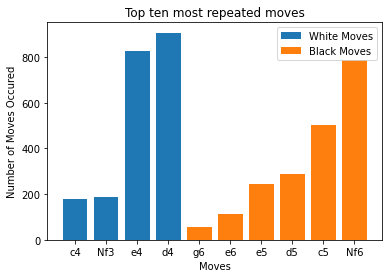

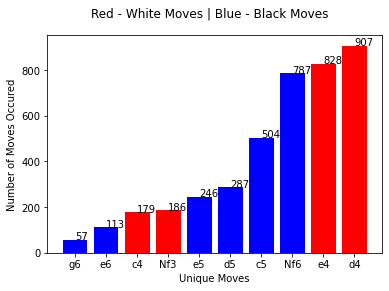

In [45]:
#clall class
c = chess_games('chess_game.pgn')
c.plotting()

Understanding of the plotted graphs:
The two graphs show the top ten most repeated first moves for both black and white players. The white player has four moves sit in the top ten list (d4, e4, nf3, c4). There are six moves for the black player in the top ten list (nf6, c5, d5, e5, e6, g6). The top three moves are d4(white) with 907 moves, e4(white) with 828, nf6(black) with 787 moves. The white player particularly likes to use e4 or d4 moves as the first, 82% of the total.

In [46]:
c.clear_chess_moves()

total games: 2110


In [47]:
c.split_white_black_moves()

total games: 2110
white and black players moves for all games has been seprated into each files


In [48]:
c.dataframe_counts()

total games: 2110


(    White
 e4    828
 c4    179
 Nf3   186
 d4    907
 g3      3
 e3      3
 d3      1
 Nc3     1
 b3      2,
     Black
 c5    504
 e6    113
 e5    246
 d6     30
 c6     56
 Nf6   787
 d5    287
 g6     57
 f5     19
 Nc6     6
 b6      3
 b5      1)